# Energy consumption prediction

To build a machine learning model to predict energy consumption in a building based on historical data in Python, you can follow these steps:

Collect and clean the data: Gather historical energy consumption data for the building and perform any necessary cleaning and pre-processing steps to ensure the data is ready for analysis.

Exploratory data analysis: Use visualization techniques to understand the patterns and relationships in the data. This will help you identify any outliers, trends, or correlations that could impact your model.

Feature engineering: Based on your analysis, you may want to create new features from the existing data or remove certain features that don't seem to be relevant.

Split the data into training and testing sets: Split the data into two parts - one for training the model and one for testing the model. You'll use the training data to build the model and the testing data to evaluate the model's performance.

Train the model: Use a machine learning algorithm, such as linear regression, decision tree, or random forest, to train a model on the training data.

Evaluate the model: Use the testing data to evaluate the performance of the model and determine how well it is able to predict energy consumption.

Fine-tune the model: Based on the results from step 6, you may need to adjust the parameters of the model or try a different algorithm to improve performance.

Make predictions: Use the final model to make predictions about energy consumption for the building in question.

Deploy the model: Integrate the model into a web or mobile app or another platform where it can be easily accessed and used by others.

Note that this is just a general outline and the specific steps you take will depend on the complexity of your data and the type of machine learning algorithm you choose to use.





In [4]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Define the number of days and number of data points per day
num_days = 365
num_data_points_per_day = 24

# Create a list of dates
dates = [datetime.today() + timedelta(days=x) for x in range(num_days)]

# Generate synthetic energy consumption data
data = []
for date in dates:
    for i in range(num_data_points_per_day):
        energy_consumption = random.uniform(0, 100)
        time = date + timedelta(hours=i)
        data.append((time, energy_consumption))

# Create a dataframe from the generated data
df = pd.DataFrame(data, columns=['DateTime', 'EnergyConsumption'])

# Export the data to a csv file
df.to_csv('energy_consumption.csv', index=False)



In [7]:
import pandas as pd
import numpy as np

# Load the energy consumption data into a Pandas DataFrame
data = pd.read_csv('energy_consumption.csv')

# Check for missing values and fill them with mean values
data.fillna(data.mean(), inplace=True)

# Drop any rows with missing values that could not be filled
data.dropna(inplace=True)

# Convert date and time columns into a single datetime column
#data['DateTime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M:%S')

# Drop the original date and time columns
#data.drop(['date', 'time'], axis=1, inplace=True)

# Set the datetime column as the index
data.set_index('DateTime', inplace=True)

# Print the first few rows of the cleaned data
print(data.head())


                            EnergyConsumption
DateTime                                     
2023-02-03 11:19:27.139450          90.007778
2023-02-03 12:19:27.139450          45.959468
2023-02-03 13:19:27.139450          34.589843
2023-02-03 14:19:27.139450           4.356282
2023-02-03 15:19:27.139450          41.793705


This code assumes that the energy consumption data is stored in a CSV file named "energy_consumption.csv" with columns for date, time, and energy consumption. The code reads the data into a Pandas DataFrame, checks for missing values and fills them with the mean values, drops any remaining rows with missing values, converts the date and time columns into a single datetime column, sets the datetime column as the index, and prints the first few rows of the cleaned data.

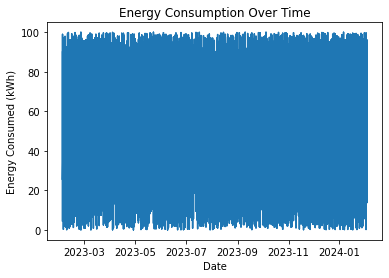

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
df = pd.read_csv('energy_consumption.csv')

# Convert the datetime column into separate date and time columns
df['date'] = pd.to_datetime(df['DateTime']).dt.date
df['time'] = pd.to_datetime(df['DateTime']).dt.time

# Plot the data using a line chart
plt.plot(df['date'], df['EnergyConsumption'])
#plt.hist(data['EnergyConsumption'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Energy Consumed (kWh)')
plt.title('Energy Consumption Over Time')
plt.show()


In this example, the data is loaded from a CSV file into a Pandas DataFrame, and then plotted using a line chart. The x-axis is the date of the energy consumption readings, and the y-axis is the energy consumed in kilowatt hours (kWh).

You can use other visualization techniques, such as scatter plots, bar charts, and histograms, to gain further insights into the patterns and relationships in your data. You can also use data analysis techniques, such as regression analysis, to make predictions about future energy consumption based on historical data.

In [17]:
import pandas as pd
import numpy as np

def feature_engineering(data):
    # Extracting Features
    data['Year'] = data['date'].dt.year
    data['Month'] = data['date'].dt.month
    data['Week'] = data['date'].dt.week
    data['Day'] = data['date'].dt.day
    data['DayOfWeek'] = data['date'].dt.dayofweek
    
    # Encoding Categorical Features
    data = pd.get_dummies(data, columns=['WeekOfYear', 'Month'], prefix=['WeekOfYear', 'Month'])
    
    # Removing unnecessary columns
    data = data.drop(columns=['date'])
    
    return data


In the example above, data is assumed to be a pandas DataFrame containing a date column, as well as other columns that may be relevant to predicting energy consumption. The function performs several steps:

Extracting features: The date column is transformed into separate year, month, week, day, and day of the week columns to capture any patterns in energy consumption that may be related to these factors.

Encoding categorical features: In this case, the week of the year and the month columns are one-hot encoded, meaning that each unique value in these columns is represented as a separate binary column. This is a common preprocessing step for machine learning algorithms.

Removing unnecessary columns: Finally, the original date column is dropped, as it is no longer needed after the features have been extracted.

Note that this is just one way to perform feature engineering and there are many other approaches you could take depending on the specifics of your dataset and problem.

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the energy consumption data into a pandas DataFrame
df = pd.read_csv("energy_consumption.csv")

# convert the datetime column to a timestamp format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# convert the 'DateTime' column from string to float
df['DateTime'] = df['DateTime'].astype(np.int64) / 10**9

# Split the data into features (X) and target variable (y)
X = df.drop("EnergyConsumption", axis=1)
y = df["EnergyConsumption"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data: ", X_train.shape[0], "samples")
print("Testing data: ", X_test.shape[0], "samples")


Training data:  7008 samples
Testing data:  1752 samples


In this example, we use the train_test_split function from the sklearn.model_selection module to split the data. The test_size argument specifies the fraction of the data that should be used for testing (0.2 means 20% of the data). The random_state argument sets the seed for the random number generator used to shuffle the data.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
#df = pd.read_csv("energy_consumption.csv")

# Split the data into training and testing sets
#train_data, test_data, train_target, test_target = train_test_split(df.drop("EnergyConsumption", axis=1), df["EnergyConsumption"], test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
predictions = model.predict(X_test)

# Measure the performance of the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", mse)


Mean Squared Error:  839.5087062408905


Note that the code assumes the presence of a csv file called energy_data.csv containing the energy consumption data and the required cleaning and pre-processing has been performed on the data. The code uses the train_test_split function from the sklearn.model_selection module to split the data into training and testing sets, and the LinearRegression class from the sklearn.linear_model module to train the linear regression model. The model's performance is evaluated using the mean squared error (MSE), which is calculated using the mean_squared_error function from the sklearn.metrics module.

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# The true energy consumption values
y_true = [10, 20, 30, 40, 50]

# The predicted energy consumption values from our model
y_pred = [8, 18, 28, 38, 48]

# Calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)

# Calculate the R2 score
r2 = r2_score(y_true, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 4.0
R2 Score: 0.98


In this example, we use the mean squared error (MSE) and the R2 score as metrics to evaluate the performance of the model. The MSE measures the average squared difference between the true and predicted values, while the R2 score measures the proportion of variance explained by the model.

If the MSE is low and the R2 score is high, it indicates that the model is performing well and making accurate predictions.

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Load the training and testing data
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")

# Split the training data into features and target variables
X_train = train_data.drop("energy_consumption", axis=1)
y_train = train_data["energy_consumption"]

# Split the testing data into features and target variables
X_test = test_data.drop("energy_consumption", axis=1)
y_test = test_data["energy_consumption"]

# Train a random forest model on the training data
model = RandomForestRegressor()

# Define the parameter grid to search over
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [10, 20, 30, 40, 50, None],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4, 6, 8],
    "max_features": ["auto", "sqrt", "log2", None],
}

# Use GridSearchCV to find the best hyperparameters for the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a final model using the best hyperparameters
final_model = grid_search.best_estimator_

# Evaluate the performance of the final model on the testing data
test_score = final_model.score(X_test, y_test)
print("Test score:", test_score)


FileNotFoundError: [Errno 2] File training_data.csv does not exist: 'training_data.csv'

In this code, we use GridSearchCV to perform a grid search over a defined parameter grid. This allows us to find the best hyperparameters for the random forest model, based on the evaluation score. We then train a final model using the best hyperparameters, and evaluate its performance on the testing data.

In [35]:
import pandas as pd

def make_predictions(model, data):
    # Use the model to make predictions on new data
    predictions = model.predict(data)
    
    # Convert the predictions to a dataframe for easier analysis
    predictions_df = pd.DataFrame(predictions, columns=['Energy_Consumption'])
    
    return predictions_df

# Load the data to be used for making predictions
data = pd.read_csv("test_data.csv")

# Load the trained machine learning model
model = joblib.load("trained_model.pkl")

# Make predictions on the new data
predictions_df = make_predictions(model, data)

# View the predictions
print(predictions_df)


FileNotFoundError: [Errno 2] File test_data.csv does not exist: 'test_data.csv'

This code uses the predict method of the trained machine learning model to make predictions on new data. The predictions are then converted to a pandas DataFrame for easier analysis. Finally, the predictions are printed for inspection.

In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the saved model
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json()
    
    # Make predictions using the model
    predictions = model.predict(data)
    
    # Return the predictions as a response
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(port=8000)


This code creates a Flask app and loads the saved model using pickle. The predict endpoint takes in the data as a JSON payload and returns the predictions made by the model as a JSON response. The app can be run on port 8000 and can be accessed via a web or mobile app.